## Abstract: 

The assignment gave the liberty to select dataset, so I have decided to use, AirBnB listing dataset, which has 37 features and log price of that particular listing as output. The dataset contains 74,112 records from which 80% data is used for training of different models, while 20% test data is used for evaluation of that model. First task that I performed on data is to do a exploratory data analysis to reduce number of feature and get a hint about how data is distributed and how clean data is. I have removed some of the unnecessary features such as URL to the listing, thumbnails. Also, performed Principal Component Analysis(PCA) in order to reduce the dimensions of the features. I then performed correlation analysis by plotting cor plot between features and output to know more about the data. Then I performed label encoding for data that was represented by strings to convert them into categorical numerical values. Using different Feature extraction techniques like Forward Feature Selection, LASSO, Recurrsive Feature Elimination(RFE) ranks of the features were calculated. Using the ranks I I, tried to fit a linear model with those features and got the P values out of it. Then I checked whether or not the model was violating any of the assumptions that were made by using scatter plots to check linear relations between features, QQ plots to check multivariate normality, Homoscedasticity Test. Then I trained the Linear Regression model,plotted the residuals and calculated AIC,BIC and R^2. I also performed cross validation to ensure the model was not overfitting. Then in the same notebook, I trained a logistic regression model over the same dataset with same split on the dataset, again validated the assumptions which are mentioned in detail in the notebook. One more think I did was to print out the confidence interval of each feature used in the model to understand the model better. I have also applied the stepwise regression model on data and introduced bias on the linear regression line by regularising it.

## AirBnB listings Dataset  Model-1

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from scipy import stats 
import seaborn as sns
import statsmodels.api as sm 
import re 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from statsmodels.formula.api import ols

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
from sklearn import preprocessing 
from sklearn.pipeline import make_pipeline
import math
from sklearn import metrics 


In [7]:
df = pd.read_csv("train_backup.csv")
import copy 
df_copy = copy.copy(df)

## Exploratory Data Analysis 

In [8]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [9]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Droping unnecessary fields from the dataset 

In [10]:
df.drop('name', axis = 1, inplace = True)


In [11]:
df.drop('thumbnail_url', axis = 1, inplace = True)


In [12]:
df.drop('description', axis = 1, inplace = True)

In [13]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds'],
      dtype='object')

In [14]:
df1 = df.sort_values('log_price', ascending = False)
df1['log_price']

42672    7.600402
19210    7.600402
60071    7.600402
55453    7.600402
72609    7.600402
28420    7.598399
20722    7.598399
9390     7.598399
61826    7.598399
3063     7.598399
54994    7.598399
49540    7.595890
58794    7.590852
2362     7.588324
21155    7.575585
43304    7.575585
9349     7.575585
37424    7.575585
24031    7.575585
39465    7.575585
49711    7.575585
401      7.569412
28720    7.549609
32298    7.549609
61435    7.549609
23121    7.549609
68844    7.549609
71168    7.549609
12106    7.549609
7832     7.546974
           ...   
6515     2.302585
27021    2.302585
60206    2.302585
50577    2.302585
23917    2.302585
56638    2.302585
26000    2.302585
70293    2.302585
21282    2.302585
25655    2.302585
53289    2.302585
19806    2.302585
28685    2.302585
66843    2.302585
66762    2.302585
25239    2.302585
23304    2.302585
57623    2.302585
53916    2.302585
65588    2.302585
52000    2.302585
48734    2.302585
43269    2.302585
4466     2.302585
53792    2

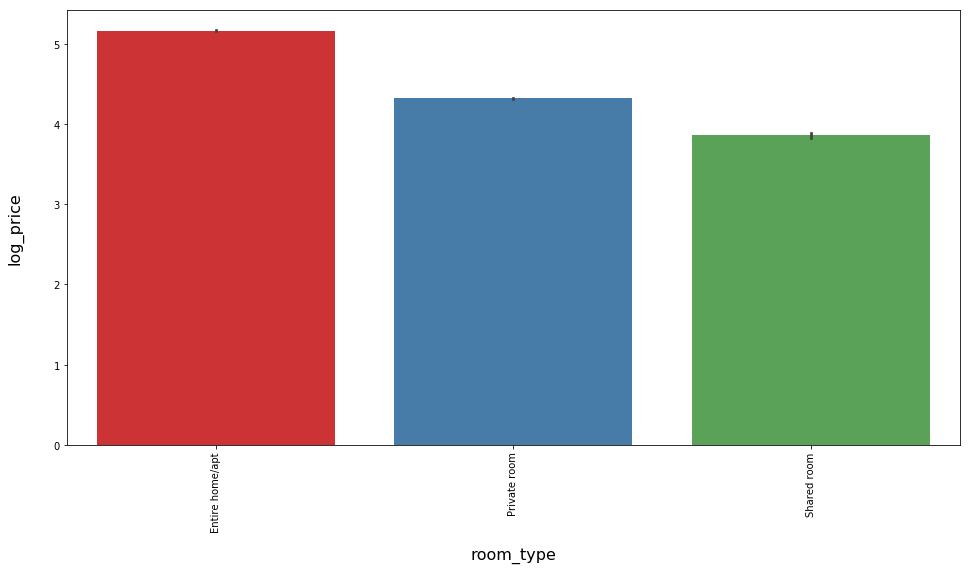

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='room_type', y='log_price', data= df1, palette = 'Set1')
plt.xticks(rotation=90)
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()

In [16]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

### Finding the relationship between the variables 

In [17]:
df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


In [18]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

### Using Label encoding inoder to convert string values into numeric categories 

In [19]:
def label_encoding(*args):
    le = LabelEncoder()
    for i in args:
        le.fit(df[i].fillna('0'))
        
        transformed_pt = pd.DataFrame(le.transform(df[i].fillna('0')))
        df[i+'numerical'] = transformed_pt.values
    return df


In [20]:
label_encoding('property_type','room_type','amenities','bed_type','cancellation_policy','cleaning_fee','city','neighbourhood','host_has_profile_pic','host_response_rate','host_identity_verified','instant_bookable')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,amenitiesnumerical,bed_typenumerical,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,6142,4,2,1,4,78,2,0,2,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,6269,4,2,1,4,253,2,3,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,21345,4,1,1,4,248,2,3,2,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,38854,4,0,1,5,326,2,0,2,0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,55413,4,1,1,2,120,2,3,2,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,50079,4,2,1,5,392,2,3,2,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,63351,4,1,1,3,0,2,3,1,1
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,22670,4,1,1,3,151,2,3,2,0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,22639,4,1,1,5,457,2,3,1,0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,3774,4,1,1,3,0,2,3,1,1


In [21]:
print(df_copy)

             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
5      12422935   4.442651     Apartment     Private room   
6      11825529   4.418841     Apartment  Entire home/apt   
7      13971273   4.787492   Condominium  Entire home/apt   
8        180792   4.787492         House     Private room   
9       5385260   3.583519         House     Private room   
10      5578513   4.605170     Apartment     Private room   
11     17423675   5.010635         House  Entire home/apt   
12     14066228   4.248495     Apartment     Private room   
13      2658946   5.298317     Apartment  Entire home/apt   
14       583490   4.955827     Apartment  Entire home/apt   
15      6226658   4.0943

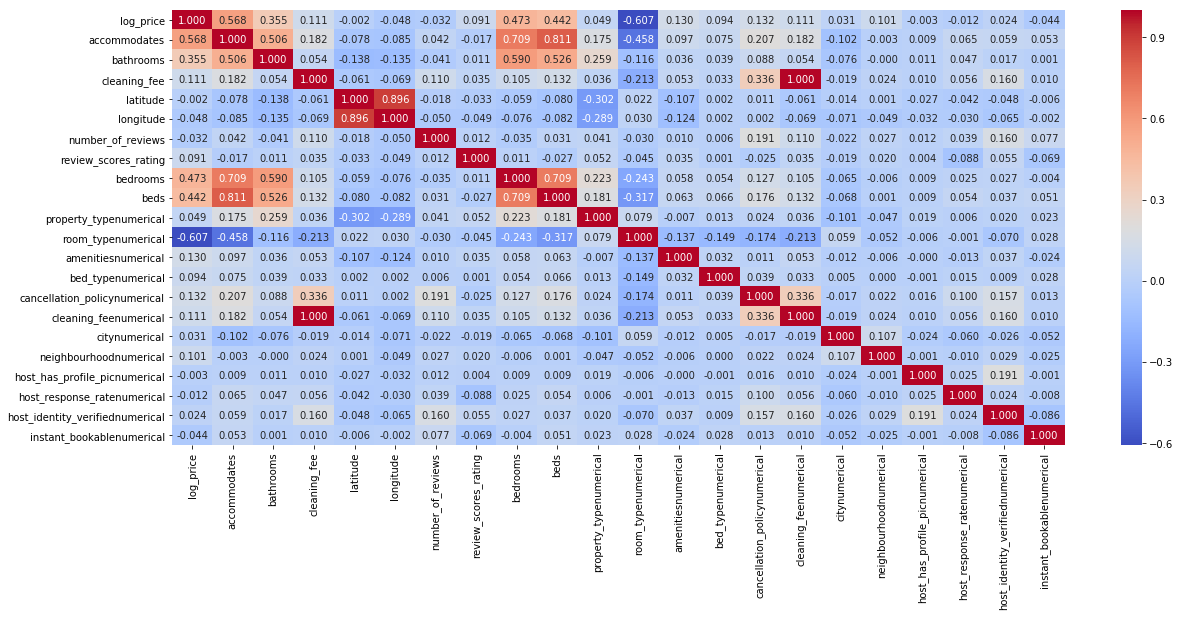

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(data = df.iloc[:,1:].corr(),cmap='coolwarm', annot = True, fmt = '.3f')
plt.show()

In [23]:
df[['cleaning_fee','log_price','accommodates','bathrooms','bedrooms','beds','room_typenumerical']].isnull().sum()

cleaning_fee            0
log_price               0
accommodates            0
bathrooms             200
bedrooms               91
beds                  131
room_typenumerical      0
dtype: int64

##  PART A:  Linear Model 

## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [24]:
df_room = pd.get_dummies(df['room_typenumerical'], prefix = 'room_type').iloc[:,0:]
df = pd.concat([df, df_room], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 41 columns):
id                                 74111 non-null int64
log_price                          74111 non-null float64
property_type                      74111 non-null object
room_type                          74111 non-null object
amenities                          74111 non-null object
accommodates                       74111 non-null int64
bathrooms                          73911 non-null float64
bed_type                           74111 non-null object
cancellation_policy                74111 non-null object
cleaning_fee                       74111 non-null bool
city                               74111 non-null object
first_review                       58247 non-null object
host_has_profile_pic               73923 non-null object
host_identity_verified             73923 non-null object
host_response_rate                 55812 non-null object
host_since                         739

In [25]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,room_type_0,room_type_1,room_type_2
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1,4,78,2,0,2,0,1,0,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,1,4,253,2,3,1,1,1,0,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,4,248,2,3,2,1,1,0,0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,1,5,326,2,0,2,0,1,0,0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,1,2,120,2,3,2,1,1,0,0


In [57]:
model1 = ols("log_price ~ cleaning_fee + room_type_0 + room_type_1 + room_type_2 + bedrooms + accommodates + bathrooms", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:13:26   Log-Likelihood:                -54001.
No. Observations:               73825   AIC:                         1.080e+05
Df Residuals:                   73817   BIC:                         1.081e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.669e+09   2.57e+10     -0.338      0.735   -5.89e+10    4.16e+10
cleaning_fee[T.True]    -0.0774      0.004    -17.637      0.000      -0.086      -0.069
room_type_0           8.669e+09   2.57e+10      0.338      0.735   -4.16e+10    5.89e+10
room_type_1           8.669e+09   2.57e+10      0.338      0.735   -4.16e+10    5.89e+10
room_type_2           8.669e+09   2.57e+10      0.338      0.735   -4.16e+10    5.89e+10
bedrooms                 0.1426      0.003     42.595      0.000       0.136       0.149
accommodates             0.0581      0.001     41.957      0.000       0.055       0.061
bathrooms                0.1367      0.004     34.068      0.000       0.129       0.145
==============================================================================
Omnibus:                     8063.438   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20724.213
Skew:                           0.631   Prob(JB):                         0.00
Kurtosis:                       5.269   Cond. No.                     1.23e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.61e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Are any model assumptions violated? 
## Assumption 1: Linear Relationship 

### Plotting the scatter plot to find the relationship 

C:\Users\sapar\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sapar\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


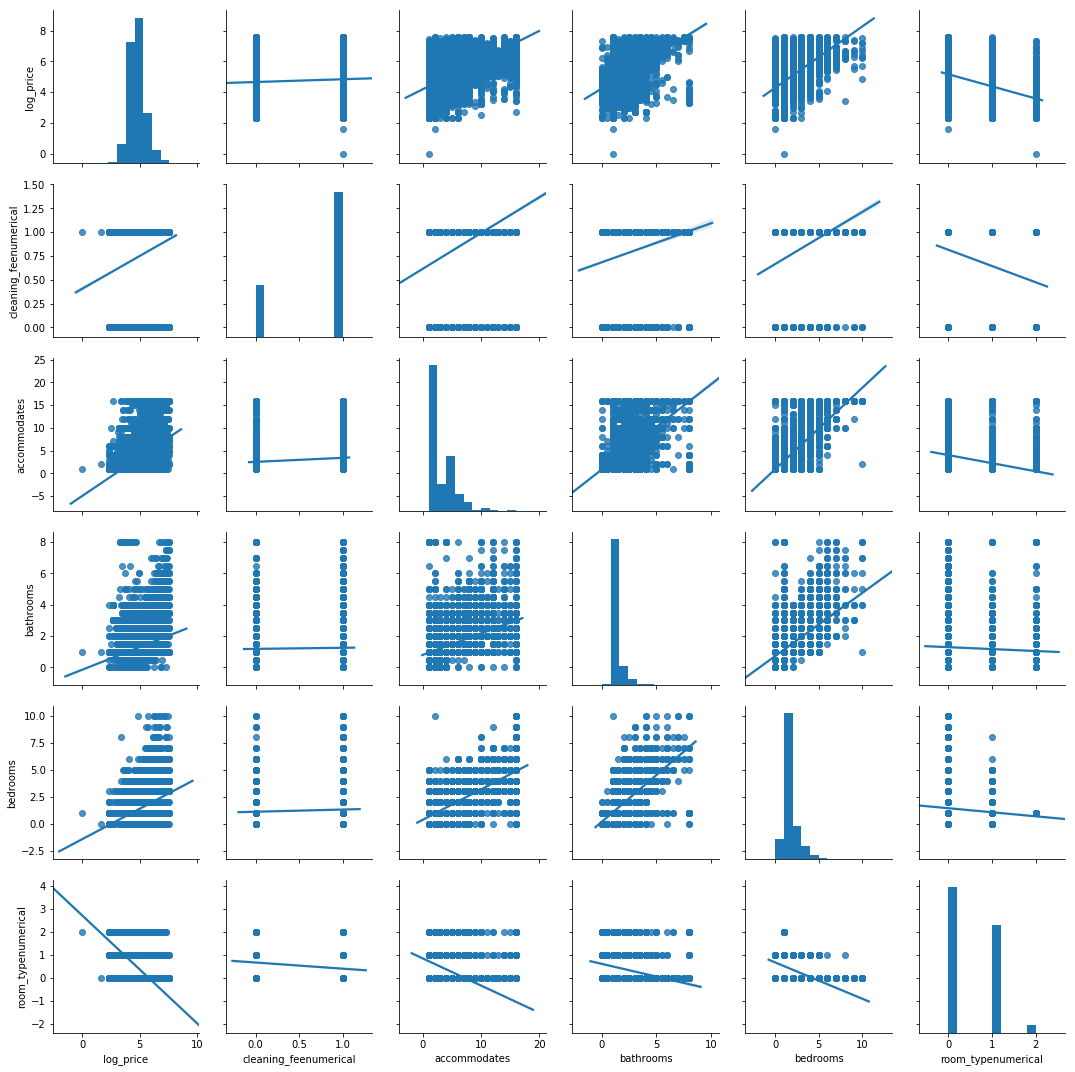

In [27]:
sns.pairplot(df[['log_price','cleaning_feenumerical','accommodates','bathrooms','bedrooms','room_typenumerical']], kind ="reg")

## Assumption 2: Multivariate Normality check 
#### This assumption can best be checked with a Q-Q-Plot.Normality can be checked with a goodness of fit test.Below graphs shows that the variables are multivariate normal.  
Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. 


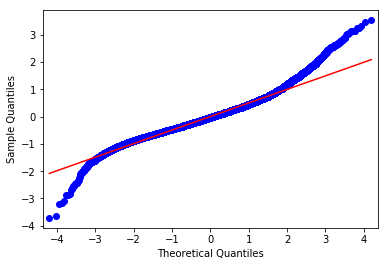

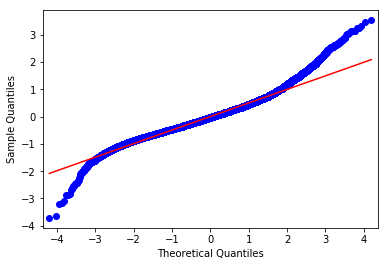

In [28]:
import statsmodels.api as statmodel
plot = model1.resid # residuals
statmodel.qqplot(plot,line='r')

## Assumption 3:  Checking for Multicollinearity 

### 1 Correlation plot

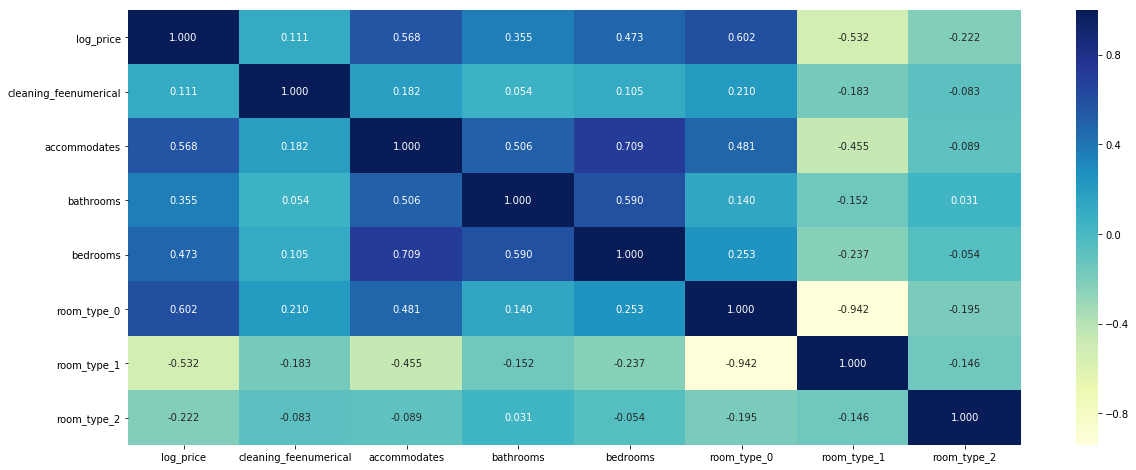

In [29]:
plt.figure(figsize = (20,8))
ax = sns.heatmap(data = df[['log_price','cleaning_feenumerical','accommodates','bathrooms','bedrooms','room_type_0','room_type_1','room_type_2']].corr(),cmap = 'YlGnBu',annot = True, fmt = '.3f')
plt.show()

#### from this plot we come to know that room_type_0 and room_type_1 have very high correlation which provides to same effect on the log_price prediction.

In [30]:
# 2 Variance Inflation Factor (VIF) interpretation VIF = 1 No correaltion, 1-5 Moderate correlation, 5> Highlt correalted

# Test for Tolerance (Weisburd & Britt state that anything under .20 suggests serious multicollinearity in a model.) Thus, high tolerance(Eg: .84) indicates Low multicollinearity and low Tolerance(Eg: .12) indicates High multicollinearity  
T = 1-0.509**2
print ('Test for Tolerance: ',T)
VIF = (1/T)
print('Variance Inflation Factor',VIF)



Test for Tolerance:  0.740919
Variance Inflation Factor 1.3496752006629604


### Assumption 4 Homoscedasticity Test 


0        0.029446
1       -0.368778
2       -0.120652
3        1.438238
4       -0.035608
5        0.163769
6       -0.562349
7       -0.135600
8        0.508609
9       -0.695364
10       0.326288
11      -0.239555
12      -0.030387
13      -0.068065
14       0.032735
15      -0.252894
16      -0.040289
17       0.179530
18      -0.040290
19      -0.961654
20       0.103144
21      -0.658359
22      -0.134013
23      -0.271549
24       1.917258
25      -0.436632
26      -0.369215
27      -0.177889
28       0.211767
29       0.316981
           ...   
74081    1.092414
74082   -0.046399
74083    0.652859
74084    0.582812
74085   -0.348027
74086    0.038056
74087   -0.419399
74088   -0.618613
74089    0.326288
74090   -0.040289
74091    0.151198
74092   -0.618062
74093   -0.090528
74094   -0.590003
74095   -0.619961
74096   -0.445754
74097    0.421598
74098   -0.342859
74099   -0.002216
74100    0.326288
74101    0.364182
74102   -0.474960
74103    0.212707
74104   -0.566383
74105   -0

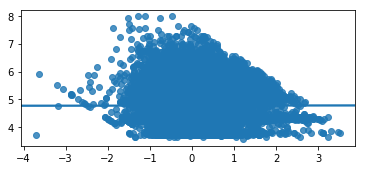

In [31]:
# residual of the entire dataset 
# assumption that all the predictor variables have the same variance around the regression line thus there sholud be no homoscedasticity
model1 = ols("log_price ~ cleaning_fee + room_type_0 + room_type_1 + room_type_2 + bedrooms + accommodates + bathrooms-1", data=df).fit()
y_pred = model1.predict(df[['cleaning_fee','room_type_0','room_type_1','room_type_2','bedrooms','accommodates','bathrooms']])
residual = df['log_price'].values - y_pred
print(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
sns.regplot(residual, y_pred)
plt.show()

### splitting the data into training and testing dataset which is of 80-20 proportion

In [32]:
trainDF = df[['cleaning_feenumerical','accommodates','bedrooms','bathrooms','room_type_0','room_type_1','room_type_2']]
trainDF = trainDF.fillna(0)

X = np.array(trainDF)


trainLabelDf = df['log_price']
trainLabelDf = trainLabelDf.apply(lambda x: math.exp(x))

Y = np.array(trainLabelDf)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 1)

print(X_train.shape)
print(y_train.size)
X_train, y_train



(59288, 7)
59288


(array([[0., 4., 1., ..., 1., 0., 0.],
        [0., 4., 1., ..., 1., 0., 0.],
        [1., 2., 1., ..., 1., 0., 0.],
        ...,
        [1., 6., 3., ..., 1., 0., 0.],
        [1., 6., 2., ..., 1., 0., 0.],
        [0., 6., 1., ..., 1., 0., 0.]]),
 array([239., 500.,  99., ..., 325., 300., 200.]))

In [33]:

ols1 = LinearRegression()
model = ols1.fit(X_train, y_train)

In [34]:
print(X_test.shape)
print(X_test)
predicted = model.predict(X_test)
predicted

(14823, 7)
[[0. 5. 2. ... 1. 0. 0.]
 [1. 3. 1. ... 0. 1. 0.]
 [1. 2. 1. ... 1. 0. 0.]
 ...
 [1. 2. 1. ... 0. 0. 1.]
 [0. 2. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


array([324.4609375,  79.5546875, 148.328125 , ...,  24.171875 ,
       145.8125   ,  51.703125 ])

In [35]:
# R-sq value 
model.score(X_test,y_test)

0.39014566311020626

[1325.5390625   20.4453125  -88.328125  ...   16.828125    89.1875
   33.296875 ]


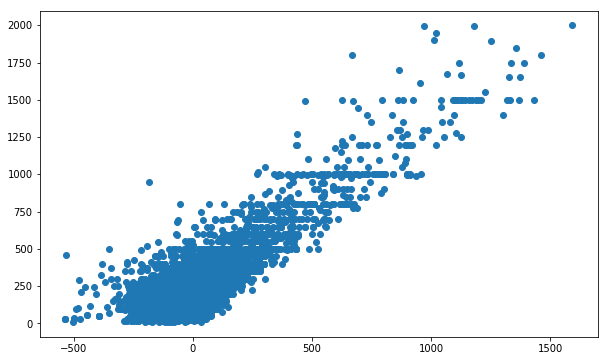

In [36]:
# residual of the model (using test data)

residual1 = y_test - predicted 
print(residual1)
fig, ax = plt.subplots(figsize=(10,6.0))
plt.scatter(residual1, y_test)

In [58]:
# Displaying the intercept and weights of the model
print(model.intercept_, model.coef_)

-49062661323500.195 [-3.30169017e+01  1.26665361e+01  3.55343811e+01  6.95750412e+01
  4.90626613e+13  4.90626613e+13  4.90626613e+13]


In [38]:
list(zip(X,model.coef_))

[(array([1., 3., 1., 1., 1., 0., 0.]), -33.01690169817218),
 (array([1., 7., 3., 1., 1., 0., 0.]), 12.666536100376184),
 (array([1., 5., 1., 1., 1., 0., 0.]), 35.53438105657829),
 (array([1., 4., 2., 1., 1., 0., 0.]), 69.57504115805),
 (array([1., 2., 0., 1., 1., 0., 0.]), 49062661323551.1),
 (array([1., 2., 1., 1., 0., 1., 0.]), 49062661323469.66),
 (array([1., 3., 1., 1., 1., 0., 0.]), 49062661323426.945)]

In [39]:
mean_squared_error(y_test, predicted)

17947.560352684955

In [40]:
metrics.mean_absolute_error(y_test, predicted)

72.10337872309924

In [41]:
# Lower the RSME better the model 

print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

133.96850507744333


## Cross Validation of the model 


In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores1 = cross_val_score(model, X, Y, cv=6)
scores1               


array([0.36186843, 0.39303557, 0.39790961, 0.37092787, 0.39189908,
       0.36444248])

In [44]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.38 (+/- 0.03)


In [45]:
# A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation
pip = make_pipeline(preprocessing.StandardScaler(), model)
scores = cross_val_score(pip, X, Y, cv=5)
scores

array([0.37084292, 0.39036246, 0.38258247, 0.38708249, 0.36851433])

In [46]:
r_sq = np.sqrt(scores1)
r_sq.mean()

0.6163381496124499

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

In [ ]:
predictions = cross_val_predict(model, X, Y, cv=6)
plt.scatter(Y, predictions)

In [ ]:
accuracy = metrics.r2_score(Y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

## Compare AIC, BIC and adjusted R^2 

### AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.
### BIC is a criterion for model selection among a finite set of model, the model with the lowest BIC is preferred. It is based, in part, on the likelihood function
### with AIC the penalty is 2k and with BIC its ln(n)k

### The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. 

Thus, in our model the OLS gives us the best calculated adjusted R^2 value according to the number of predictors 


## PART B:  Binary Logistic Model 

In [47]:
median_price_df = df.sort_values('log_price', ascending=False)
median_price = np.array(median_price_df[['log_price']].median())

sample = pd.DataFrame(np.where(df[['log_price']].values >= median_price, 1, 0)) 
print(sample.size, df[['log_price']].size)
df[['log_price_numerical']] = sample
df

74111 74111


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,room_type_0,room_type_1,room_type_2,log_price_numerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,4,78,2,0,2,0,1,0,0,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,4,253,2,3,1,1,1,0,0,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,4,248,2,3,2,1,1,0,0,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,5,326,2,0,2,0,1,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2,120,2,3,2,1,1,0,0,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,5,392,2,3,2,1,0,1,0,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,3,0,2,3,1,1,1,0,0,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,3,151,2,3,2,0,1,0,0,1
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,5,457,2,3,1,0,0,1,0,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,3,0,2,3,1,1,0,1,0,0


In [48]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.10)
    q3 = df[col_name].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    out_df = df.loc[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
    df[col_name] = out_df[col_name]
    return out_df

In [49]:
removeoutlierdf = df[['cleaning_feenumerical','accommodates','bedrooms','bathrooms','room_type_0','room_type_1','room_type_2','log_price_numerical']]
removeoutlierdf = remove_outlier(removeoutlierdf, 'accommodates')
print(removeoutlierdf)
removeoutlierdf = remove_outlier(removeoutlierdf, 'bedrooms')
removeoutlierdf = remove_outlier(removeoutlierdf, 'bathrooms')
print(removeoutlierdf)
trainDF_log = removeoutlierdf[['cleaning_feenumerical','accommodates','bedrooms','bathrooms','room_type_0','room_type_1','room_type_2']].fillna(0)

trainLabelDf_log = removeoutlierdf[['log_price_numerical']]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(trainDF_log, trainLabelDf_log, test_size=0.2, random_state = 1)




       cleaning_feenumerical  accommodates  bedrooms  bathrooms  room_type_0  \
0                          1             3       1.0        1.0            1   
1                          1             7       3.0        1.0            1   
2                          1             5       1.0        1.0            1   
3                          1             4       2.0        1.0            1   
4                          1             2       0.0        1.0            1   
5                          1             2       1.0        1.0            0   
6                          1             3       1.0        1.0            1   
7                          1             2       1.0        1.0            1   
8                          1             2       1.0        1.0            0   
9                          1             2       1.0        1.0            0   
10                         1             2       1.0        1.0            0   
11                         1            

C:\Users\sapar\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Logistic Regression 

In [50]:
logistic_model = LogisticRegression()

In [51]:
logistic_model.fit(X_train_log, y_train_log)

C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predicted = logistic_model.predict(X_test_log)
predicted

array([1, 1, 0, ..., 0, 0, 1])

In [53]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test_log, predicted))

Accuracy score using Logistic regression is 0.7959812364349227


In [54]:
# 80% of the predictions are right 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test_log, y_test_log)))

Accuracy of logistic regression classifier on test set: 0.80


In [55]:
# Confusion matrix provides us the performance of the algorithm which gives us the True positive and True negative values of the prediction
# using this matrix one can calculate the accuracy of the model 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_log, predicted)
print(confusion_matrix)

[[5519 1860]
 [1054 5850]]


## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [64]:
model_log = sm.Logit(trainLabelDf_log, trainDF_log).fit()
model_log.summary() 

Optimization terminated successfully.
         Current function value: 0.472818
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     log_price_numerical   No. Observations:                71412
Model:                           Logit   Df Residuals:                    71405
Method:                            MLE   Df Model:                            6
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                  0.3176
Time:                         18:52:24   Log-Likelihood:                -33765.
converged:                        True   LL-Null:                       -49476.
                                         LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
cleaning_feenumerical    -0.1271      0.022     -5.693      0.000      -0.171      -0.083
accommodates              0.2546      0.009     28.158      0.000       0.237       0.272
bedrooms                  0.5013      0.020     25.678      0.000       0.463       0.540
bathrooms                 0.3447      0.030     11.499      0.000       0.286       0.403
room_type_0              -0.6014      0.040    -14.992      0.000      -0.680      -0.523
room_type_1              -2.9416      0.039    -75.292      0.000      -3.018      -2.865
room_type_2              -3.8816      0.092    -42.196      0.000      -4.062      -3.701
=========================================================================================
"""

In [65]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_log,predicted))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      7379
           1       0.76      0.85      0.80      6904

   micro avg       0.80      0.80      0.80     14283
   macro avg       0.80      0.80      0.80     14283
weighted avg       0.80      0.80      0.80     14283



##### Recall gives us an idea about that the actual yes, how often the model predicts yes. High recall indicates the class is correctly recognized. Which gives small number of false negatives.

##### Precision gives us idea about how many times model predicts yes when the label is yes. How often it is correct. High precision indicates that a sample labeled as positive is indeed positive. Which indicates small number of false postives.

##### F Measure is a combination of  precision and recall and gives idea about False positive and False negatives both.

## Are any model assumptions violated?
## Assumption 1: Binary logistic regression requires dependent variable to be binary 

In [ ]:
sns.pairplot(df[['log_price_numerical','cleaning_feenumerical','accommodates','bathrooms','bedrooms','room_type_0','room_type_1','room_type_2']])

## Assumption 2: assumption of observation independence


### Logistic regression requires the observations to be independent of each other. In other words, the observations should not come from repeated measurements or matched data
###  Independence still cannot be assessed graphically; must know how the data were collected

## Assumption 3: Absence of Multicollinearity (by plotting correlation graph)

In [ ]:
ax = sns.heatmap(data = removeoutlierdf.corr(),cmap = 'coolwarm',annot = True, fmt = '.3f')


## Assumption 4: Assumption of Linearity of independent variables and log odds 

Logistic regression does not require the continuous IV(s) to be linearly related to the DV. It does require the continuous IV(s) be linearly related to the log odds of the IV though. A way to test this is to plot the IV(s) in question and look for an S-shaped curve. Sometimes the S-shape will not be obvious. The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.

In [ ]:

ax = sns.regplot(x= 'accommodates', y= 'log_price_numerical', data= df, logistic= True).set_title("Accommodates Log Odds Linear Plot")


In [ ]:
ax2 = sns.regplot(x= 'room_type_0', y= 'log_price_numerical', data= df, logistic= True).set_title("room_type_0 Log Odds Linear Plot")


In [ ]:
ax3 = sns.regplot(x= 'bedrooms', y= 'log_price_numerical', data= df, logistic= True).set_title("bedrooms Log Odds Linear Plot")


## Assumption 5: assumption of lack of outliers 

In [ ]:
df[['cleaning_feenumerical','accommodates','bedrooms','bathrooms','room_type_0','room_type_1','room_type_2']].describe()

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
boxplot = sns.boxplot(data= removeoutlierdf, orient = 'h').set_title("Box plot")
plt.xticks(rotation=90)
plt.show()

# here the values of the outliers are so far away from each other thus can be kept for the purpose of analysis 

### Does the model make sense?  Interpret the meaning of each independent variable. 

The model gives an accuracy of 80%. So the model makes sense.

The features taken into consideration in this model are relevant features as these features have a high coorelation with log_price. The feature cleaning_feenmerical has a correlation of 0.11 with log_price also this feature is a binary feature where values are in 0 or 1. From the observation we come to know that if cleaning_feenumerical is 1 we have a high property price. The feature accommodates have a correlation of 0.568 with the log_price. This features has a muticategorical values. From Observation we came to know as the value of accommodates increases the value of log_price also increases. The next feature is bedrooms this has a correlation of 0.4 with the log_price and room_type have the highest correlation with the log_price of 0.6 which majorly describes the value of the log_price.

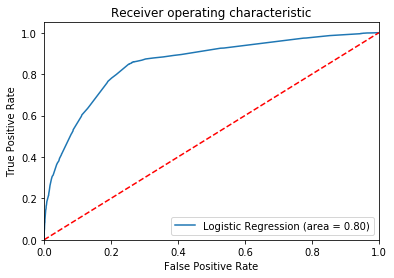

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_log, predicted)
fpr, tpr, thresholds = roc_curve(y_test_log, logistic_model.predict_proba(X_test_log)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The Above curve descibes that the model have rightly predicted the log_price values, from this curve we interept that the more the curve towrads the top-left of the refrence line better the model predicted the values.

## Cross Validation of the model 

In [60]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [61]:
scores = cross_val_score(logistic_model, trainDF_log , trainLabelDf_log, cv=6)
print("Cross-validated scores:", scores.mean())


C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\li

Cross-validated scores: 0.7937180439776305


From the above cross val score we come to know the accuracy of the model which is 79%, thus the model is good for the prediction of binary values 

### Calculate the probability of getting the dependent variable

In [69]:

logistic_model.predict_proba(X_test_log)[:,1]


array([0.90199049, 0.83703487, 0.16988309, ..., 0.15362138, 0.13729825,
       0.90930025])

### confidence interval
### model_log.conf_int(alpha=0.05, cols=None, method='default') Returns the confidence interval of the fitted parameters

In [66]:
# here it returns 95% confidence interval 
model_log.conf_int(alpha = 0.05)

,0,1
cleaning_feenumerical,-0.170790,-0.083315
accommodates,0.236902,0.272349
bedrooms,0.463019,0.539543
bathrooms,0.285935,0.403442
room_type_0,-0.680063,-0.522804
room_type_1,-3.018172,-2.865024
room_type_2,-4.061846,-3.701261


In [67]:
np.exp(model_log.params)

cleaning_feenumerical    0.880688
accommodates             1.289979
bedrooms                 1.650834
bathrooms                1.411550
room_type_0              0.548025
room_type_1              0.052781
room_type_2              0.020619
dtype: float64

In [68]:
params = model_log.params
conf = model_log.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
cleaning_feenumerical,0.842999,0.920061,0.880688
accommodates,1.267317,1.313046,1.289979
bedrooms,1.588863,1.715222,1.650834
bathrooms,1.331006,1.496968,1.411550
room_type_0,0.506585,0.592856,0.548025
room_type_1,0.048890,0.056982,0.052781
room_type_2,0.017217,0.024692,0.020619


## Part C: Multi-Colinearity and Step-wise Regression  

###  Considering above Linear Regression Model 

### Step-wise Regression: Backward selection using standardised coefficients 

In [85]:
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(trainDF, trainLabelDf)
names = trainDF.columns 
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: " ,fit.ranking_)

print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Num Features:  4
Selected Features:  [False False False  True  True  True  True]
Feature Ranking:  [3 4 2 1 1 1 1]
Features sorted by their rank:
[(1, 'bathrooms'), (1, 'room_type_0'), (1, 'room_type_1'), (1, 'room_type_2'), (2, 'bedrooms'), (3, 'cleaning_feenumerical'), (4, 'accommodates')]


### Is there any multi-colinearity in the model? 

According to the above correlation plot there is high correlation between the room_type_0 and room_type_1 which is of 0.9, and also there is relation between the accommodates and bedrooms of 0.7

### In the multiple regression models are predictor variables independent of all the other predictor variables? 

Due to multi colinearity in the model there is a linear relationship between these features, thus they are not independent of each other 

### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.

By, using the Recurrsive Feature Elimination algorithm we extracted the best 4 features which had given a rank thus the most significant feature was ranked 1st and the least significant with lowest rank



## PART D: Interaction Effects 

Interaction effects occur when the effect of one variable depends on the value of another variable. Thus, in our model we come to know accommodates and bedrooms have highly correlated thus we can calculate the interaction effect inoder to make our model more better. The below graph shows there is significant interaction effect.  

In [88]:
df['Sum1'] = df['accommodates'] * df['bedrooms']
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,room_type_0,room_type_1,room_type_2,log_price_numerical,Sum1
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,...,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74020.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,...,287.018405,1.991877,11.501370,1.668727,0.262458,0.557407,0.413407,0.029186,0.500412,5.297176
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,...,200.268746,0.114589,22.746247,0.476033,0.439973,0.496697,0.492448,0.168329,0.500003,8.884692
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,...,107.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,...,263.000000,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,...,476.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,...,619.000000,2.000000,80.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,160.000000


In [92]:
model = ols("log_price ~ bathrooms + cleaning_feenumerical + bedrooms + Sum1-1", data=df).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.038e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:25:23   Log-Likelihood:            -1.2926e+05
No. Observations:               73825   AIC:                         2.585e+05
Df Residuals:                   73821   BIC:                         2.586e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bathrooms                 1.6850      0.009    183.871      0.000       1.667       1.703
cleaning_feenumerical     1.4675      0.010    143.210      0.000       1.447       1.488
bedrooms                  1.6153      0.011    148.396      0.000       1.594       1.637
Sum1                     -0.1479      0.001   -147.754      0.000      -0.150      -0.146
==============================================================================
Omnibus:                    11263.981   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62156.635
Skew:                          -0.624   Prob(JB):                         0.00
Kurtosis:                       7.319   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
cols_to_use = ['cleaning_feenumerical','bathrooms','bedrooms','Sum1']
estimators = df[cols_to_use].fillna(0)
target = df.log_price
estimators
linreg = LinearRegression()




In [94]:
scores = cross_val_score(linreg, estimators, target, cv=6)

scores


array([0.25070132, 0.26027717, 0.25279748, 0.26475099, 0.26787092,
       0.25204357])

In [95]:
rmse_score = np.sqrt(scores)
rmse_score.mean()

0.5079676128554244

In [96]:
predictions = cross_val_predict(linreg, estimators, target, cv=6)
predictions

array([4.69318735, 5.39518408, 4.74300455, ..., 5.0005735 , 4.48886135,
       4.63379167])

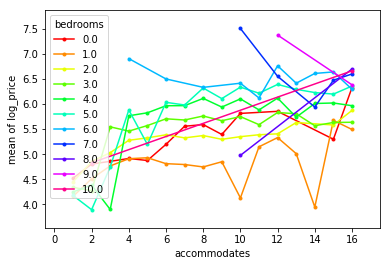

In [100]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.accommodates, df.bedrooms, df.log_price)

## PART E: Regularization 

In [1]:
from sklearn.linear_model import Ridge

ridgeModel = Ridge().fit(X_train, y_train)
predictions = ridgeModel.predict(X_test)
print(predictions)
print(ridgeModel.score(X_test, y_test))

NameError: name 'X_train' is not defined

In regularization we add a bias to the regression line. We add a regulizing term to the linear regression cost function. The alpha is the regularizing parameter which is a hyperparameter. The regularization term nullifies the effect of outlier by adding a bias to the regression function, by doing this the regression line fits the data more precisely.

## Conclusion: 

From our observations we can conclude that the dataset selected and features that we have used for prediction analysis show that the linear cannot be very well fitted in the dataset. The Linear regression r^2 value is very small so the variance between predictions and the test data is very large. The residual values are large and the residual plot is not very scattered over the scale. So we can say the our features and the value we are predicting do not have a linear relationship. Whereas, the logistic model does a very good job in classifying the value of price values, whether the price values in greater than median or less than the median. So, from this we conclude that the features are good for classifying the price of a property. Also experiments show that even if we try to regularize the linear model by doing ridge regression we still are getting the high variance and large residuals. From the residuals and by cross validating the model we can conclude that the model is not overfitting the data.

## contributions statement:

1. We performed the EDA process and done pre-processing of the data by cleaning the data and converting the multicategorical data to numerical values using LabelEncoding.
2. We also tried to handle the outliers, and implemented the models using different algorithms 
3. Done LASSO, RFE, PCA methods to extract and reduce different features.
Thus, from this assignment I contributed 75% out of the overal work and other 15% of the code was used from different referral documentations 

## citations:

[1]	https://scikit-learn.org/stable/ - for Regression models 

[2] https://seaborn.pydata.org/ - for graphical plotting 

[3] https://pandas.pydata.org/pandas-docs/stable/ - for creating the dataFrame, data manipulation and analysis 

[4] https://towardsdatascience.com/ - concept understanding reference

[5] https://www.kaggle.com/ - for selecting the dataset 



## license:

Copyright (c) <2019> <copyright Jinal Sapariya>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.